# Numerical Computing :: Project Six
### Julia Troni

In [1]:
%matplotlib notebook
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np
import math

### 1. Make a plot that shows (i) all the points that satisfy f1 = 0 and (ii) all the points that satisfy f2 = 0. Identify the points on the plot that satisfy both f1 = 0 and f2 = 0.

<IPython.core.display.Javascript object>


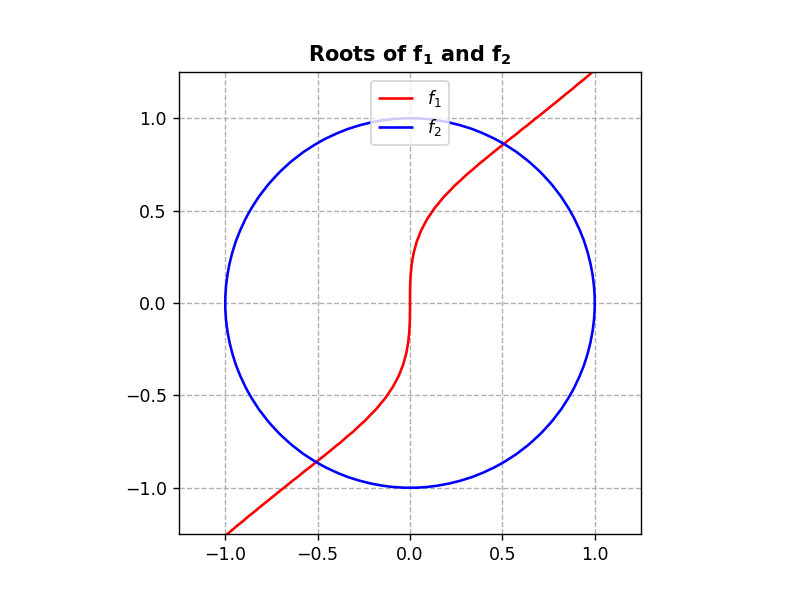

In [2]:
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)

X, Y = np.meshgrid(x,y)

F = X**3 - Y**3 + X
F2 = X**2 + Y**2 - 1.0

fig, ax = plt.subplots()

CS1 = ax.contour(X,Y,F,[0], colors=['red'])
CS2 = ax.contour(X,Y,F2,[0], colors=['blue'])

ax.set_aspect(1)


plt.title('$\\bf{Roots\ of\ f_1\ and\ f_2}$', fontsize=12)
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
plt.grid(linestyle='--')

# adding labels to the graph was surprisingly obnoxious
labels = ['$f_1$', '$f_2$']
for i in range(len(labels)):
    if i == 0:
        CS1.collections[i].set_label(labels[i])
    else:
        CS2.collections[0].set_label(labels[i])
plt.legend(loc='upper center')

#labeling and finding intersections and roots proved more frusturating than I anticipated. 
#I opted to call this good enough and move on to the implementation and com back to try to figure this out 


plt.show()

#### -  x,y coords should of intersection: (0.508,0.061) and (-0.508,-0.061)
#### - the roots of $f_1$ are x=1 and x=-1. 
#### - the root of $f_2$ is x=0

### 2. By hand, calculate the 2 × 2 Jacobian matrix of the system (f1, f2)


$J(x_1,x_2) = \frac{\partial(f_1,f_2)}{\partial(x_1,x_2)} = \begin{vmatrix} \dfrac{\partial f_1}{\partial x_1} & \dfrac{\partial f_1}{\partial x_2} \\ \dfrac{\partial f_2}{\partial x_1} & \dfrac{\partial f_2}{\partial x_2} \end{vmatrix} $

$= \begin{vmatrix} 3x_1^2+1 & -3x_2^2 \\ 2x_1 & 2x_2 \end{vmatrix} \nonumber$

### 3. Use Newton’s method for systems to find the two solutions to the system of equations (f1 = 0, f2 = 0). Try several (10 or so) different initial guesses. Make a table of the answer that Newton’s method gives—something like

In [3]:
import numpy as np

def Newton_system(F, J, x, eps):
    """
    Solve nonlinear system F=0 by Newton's method.
    J is the Jacobian of F. Both F and J must be functions of x.
    At input, x holds the start value. The iteration continues
    until ||F|| < eps.
    """
    F_value = F(x)
    F_norm = np.linalg.norm(F_value, ord=5)  # l2 norm of vector
    iteration_counter = 0
    print("initial guess", x)
    print("initial fval", F_value)
    print("initial fnorm", F_norm)
    while abs(F_norm) > eps and iteration_counter < 100:
        delta = np.linalg.solve(J(x), F_value)
        x = x + delta
        F_value = F(x)
        F_norm = np.linalg.norm(F_value, ord=2)
        iteration_counter += 1
        print("iter count: " , iteration_counter)
        print("x", x)
        print("fval", F_value)
        print ("x,itercount  " , x,iteration_counter)
    # Here, either a solution is found, or too many iterations
    
        # Here, either a solution is found, or too many iterations
        ##code is always stopping here 
    if abs(F_norm) > eps:
        iteration_counter = -1
        print("returning ")
        return "Does not converge try a new initial guess", x, iteration_counter 

    return "converges final answer" ,x,iteration_counter

In [4]:

    def F(x):
        return np.array(
            [x[0]**3 - x[1]**3 + x[0],
             x[0]**2 + x[1]**2 -1 ])

    def J(x):
        return np.array(
            [[3*x[0]**2+1, 3*x[1]**2],
             [2*x[0], 2*x[1] ]])
    
    Newton_system(F, J, x=np.array([.8,.8]), eps=0.0001)

initial guess [0.8 0.8]
initial fval [0.8  0.28]
initial fnorm 0.8008385900728692
iter count:  1
x [1.264 0.511]
fval [3.15005491 0.858817  ]
x,itercount   [1.264 0.511] 1
iter count:  2
x [ 1.91031094 -0.24737285]
fval [8.89672307 2.71048121]
x,itercount   [ 1.91031094 -0.24737285] 2
iter count:  3
x [ 2.65120668 -0.00441721]
fval [21.28626504  6.02891636]
x,itercount   [ 2.65120668 -0.00441721] 3
iter count:  4
x [   3.61524166 -103.82622071]
fval [1119285.49274481   10791.9540784 ]
x,itercount   [   3.61524166 -103.82622071] 4
iter count:  5
x [2404.42454809  -72.20098428]
fval [1.39009760e+10 5.78646939e+06]
x,itercount   [2404.42454809  -72.20098428] 5
iter count:  6
x [  3217.63483729 -13062.77060053]
fval [2.26229134e+12 1.80989149e+08]
x,itercount   [  3217.63483729 -13062.77060053] 6
iter count:  7
x [ 40179.15350945 -10886.04281175]
fval [6.61538548e+13 1.73287030e+09]
x,itercount   [ 40179.15350945 -10886.04281175] 7
iter count:  8
x [ 55523.73128469 -33842.31905186]
fval [2

('Does not converge try a new initial guess',
 array([ 8.90528301e+20, -5.20784110e+20]),
 -1)

Ok I am sorry I spent all weekend trying to fix this and it is making me frusturated. Ideally I will set up an office hours appointment but this is midterm week so I am submitting for now and hopefully the solution comes to me when I am in the shower or something and/or I meet with Paul a week after my midterms

Anyhow, I know the x,y coords should of intersection should be (0.508,0.061) and (-0.508,-0.061) and the roots of $f_1$ should be x=1 and x=-1. For $f_2$ the root should be should be x=0

I have tried multiple variations of this code as well as multiple other functions, although this one did overall better than my other attempts  

## References

- https://www.youtube.com/watch?v=Cs1g4qhgGxg for how one might do this by hand, helped me understand what I want my dumb code to do, unfortunately I didn't get there with my code YET

- http://hplgit.github.io/prog4comp/doc/pub/._p4c-solarized-Python031.html although now after wasting so much time I think this might be incorrect and its irritating me

- Lectures were informative and I thought this homework would be quite easy, however I clearly thought wrong and got stuck somewhere 

- https://www.cmu.edu/math/undergrad/suami/pdfs/2014_newton_method.pdf

- graphed on sym lab to check my graph and determine the intersections https://www.symbolab.com/solver/non-linear-system-of-equations-calculator/x%5E%7B3%7D-y%5E%7B3%7D%2Bx%3D0%2C%20x%5E%7B2%7D%2By%5E%7B2%7D%3D1?or=input

